Vehicle Insurance Claims Prediction

The "Vehicle Insurance Claims Prediction" project was part of the "Allstate Claim Prediction Challenge" on Kaggle, held on 13-07-2011, with a focus on predicting claims payments. The goal was to develop predictive models to estimate insurance claims payments based on historical data and relevant features, using various machine learning techniques, data preprocessing methods, and feature engineering approaches to improve prediction accuracy.

Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

Import data:

In [2]:
train_data = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\train_set.csv')
y_train = train_data['Claim_Amount']

test_data = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\test_set.csv')
example_entry = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\example_entry.csv')
test_data = test_data.merge(example_entry, on='Row_ID', how='left')
y_test = test_data['Claim_Amount']

In [3]:
print('Number of training samples: ', format(len(train_data),','))
print('Number of test samples: ', format(len(test_data), ','))
print('Train % : ', round(len(train_data) / (len(train_data) + len(test_data)), 3)*100,'%')
print('Test %  : ', round(len(test_data) / (len(train_data) + len(test_data)), 3)*100, '%')

Number of training samples:  13,184,290
Number of test samples:  4,314,865
Train % :  75.3 %
Test %  :  24.7 %


In [4]:
print('Features in training data: \n', train_data.columns)
print('Features in test data: \n', test_data.columns)

Features in training data: 
 Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')
Features in test data: 
 Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')


In [56]:
train_data.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [54]:
Unique_HID = train_data['Household_ID'].nunique() / len(train_data['Household_ID'])
print("% of unique values in Household_ID: {:.2f}%".format(Unique_HID * 100))

% of unique values in Household_ID: 32.68%


In [26]:
print(train_data['Vehicle'].nunique())
np.sort(train_data['Vehicle'].unique())

28


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29], dtype=int64)

<Axes: xlabel='Vehicle', ylabel='Claim_Amount'>

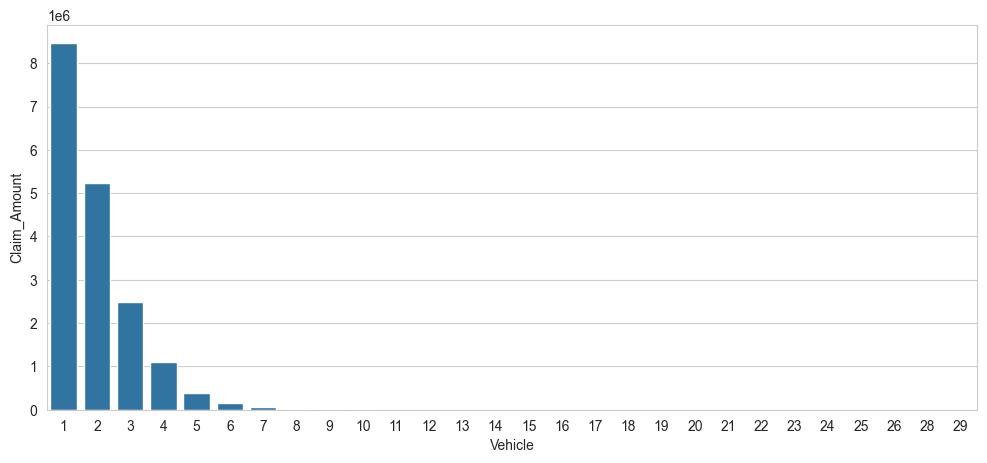

In [69]:
plt.figure(figsize=(12,5))
plt.title('Vehicle count')
sns.barplot(train_data.groupby(by='Vehicle')['Claim_Amount'].agg('sum', 'count'))

In [73]:
train_data.columns

Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')

In [81]:
train_data[['Row_ID', 'Household_ID', 'Vehicle']].head(16)

,Row_ID,Household_ID,Vehicle
0,1,1,3
1,2,2,2
2,3,3,1
3,4,3,1
4,5,3,2
5,6,3,2
6,7,4,1
7,8,4,2
8,9,4,3
9,10,5,1


In [83]:
train_data[train_data['Household_ID']==5]

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
9,10,5,1,2005,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
10,11,5,1,2006,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
11,12,5,3,2005,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
12,13,5,3,2006,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
13,14,5,4,2005,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
14,15,5,4,2006,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0


In [19]:
train_data['Calendar_Year'].unique()

array([2005, 2006, 2007], dtype=int64)

In [27]:
print(train_data['Model_Year'].nunique())
np.sort(train_data['Model_Year'].unique())

29


array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009], dtype=int64)

In [30]:
print(train_data['Blind_Make'].nunique())
np.sort(train_data['Blind_Make'].unique())

75


array(['?', 'A', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
       'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
       'AV', 'AW', 'AX', 'AY', 'AZ', 'B', 'BA', 'BB', 'BC', 'BD', 'BF',
       'BG', 'BH', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS',
       'BT', 'BU', 'BV', 'BW', 'BY', 'BZ', 'C', 'CA', 'CB', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

In [29]:
print(train_data['Blind_Model'].nunique())
np.sort(train_data['Blind_Model'].unique())

1303


array(['?', 'A.2', 'A.3', ..., 'Z.45', 'Z.5', 'Z.8'], dtype=object)

In [31]:
print(train_data['Blind_Submodel'].nunique())
np.sort(train_data['Blind_Submodel'].unique())

2740


array(['?', 'A.2.0', 'A.3.0', ..., 'Z.45.0', 'Z.5.0', 'Z.8.0'],
      dtype=object)

In [32]:
print(train_data['Cat1'].nunique())
np.sort(train_data['Cat1'].unique())

11


array(['?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
      dtype=object)

In [35]:
print(train_data['OrdCat'].nunique())
train_data['OrdCat'].unique()

15


array(['4', '5', '2', '6', '3', '?', '1', '7', 4, 2, 5, 3, 1, 6, 7],
      dtype=object)

In [38]:
print(train_data['Var1'].nunique())
np.sort(train_data['Var1'].unique()[:10])

360


array([-0.7542818, -0.6337572, -0.3766379,  0.017076 ,  0.2179505,
        0.3224052,  0.4429298,  0.5634545,  0.7000491,  1.2705325])

In [40]:
print(train_data['NVCat'].nunique())
train_data['NVCat'].unique()

15


array(['M', 'O', 'F', 'N', 'J', 'L', 'B', 'H', 'A', 'G', 'K', 'I', 'E',
       'C', 'D'], dtype=object)

In [41]:
print(train_data['NVVar1'].nunique())
train_data['NVVar1'].unique()

29


array([-0.2315299,  2.0546834,  1.4831301,  3.1977899,  2.5119259,
        1.1401981,  0.9115767,  4.3408966,  6.62711  ,  1.7280815,
        0.7482758,  0.6258001,  2.7078872,  3.8836539,  5.2553821,
        4.9124498,  0.4543341,  3.6876929,  1.2926123,  4.05512  ,
        2.3404601,  0.5305412,  0.6829554,  1.8260621,  1.6390083,
        0.3400235,  5.4840031,  1.0154955,  2.8167543])